<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [4]:
import pandas as pd
df = pd.read_csv('https://data.cityofnewyork.us/resource/rc75-m7u3.csv')

## Display top 7 rows of the dataframe in your notebook

In [5]:
df.head(7)

,date_of_interest,case_count,probable_case_count,hospitalized_count,death_count,death_count_probable,case_count_7day_avg,all_case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,...,si_probable_case_count,si_hospitalized_count,si_death_count,si_probable_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_hospitalized_count_7day_avg,si_death_count_7day_avg,si_all_death_count_7day_avg,incomplete
0,2020-02-29T00:00:00.000,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01T00:00:00.000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02T00:00:00.000,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03T00:00:00.000,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04T00:00:00.000,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-03-05T00:00:00.000,3,0,14,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,2020-03-06T00:00:00.000,8,0,8,0,0,3,3,5,0,...,0,1,0,0,0,0,0,0,0,0


## Count number of null values (if any) for each column

In [6]:
#show null values for each columns
df.isnull().sum()

date_of_interest                  0
case_count                        0
probable_case_count               0
hospitalized_count                0
death_count                       0
                                 ..
si_all_case_count_7day_avg        0
si_hospitalized_count_7day_avg    0
si_death_count_7day_avg           0
si_all_death_count_7day_avg       0
incomplete                        0
Length: 62, dtype: int64

In [7]:
#show number of null values for entire dataframe
df.isnull().sum().sum()

0

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [8]:
df= df[['case_count','hospitalized_count']]
df

,case_count,hospitalized_count
0,1,1
1,0,1
2,0,2
3,1,7
4,5,2
...,...,...
614,850,35
615,738,23
616,457,24
617,513,13


## Display the average, median, and standard deviation of each of your numerical columns

In [9]:
df.describe()

,case_count,hospitalized_count
count,619.000000,619.000000
mean,1493.387722,182.285945
std,1463.184784,286.245664
min,0.000000,1.000000
25%,366.500000,38.500000
50%,916.000000,75.000000
75%,2214.500000,238.500000
max,6593.000000,1849.000000


## Plot two of the numerical columns one against the other in a scatter plot

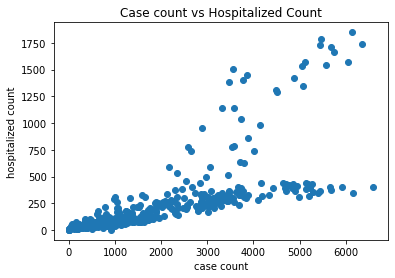

In [10]:
import matplotlib.pyplot as plt
x_data= df['case_count']
y_data= df['hospitalized_count']
plt.title('Case count vs Hospitalized Count')
plt.xlabel('case count')
plt.ylabel('hospitalized count')
plt.scatter(x_data,y_data)
plt.show()

## Plot the data distribution of all your numerical columns in histogram and boxplot

<AxesSubplot:>

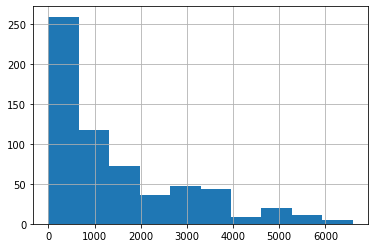

In [11]:
df['case_count'].hist()

<AxesSubplot:>

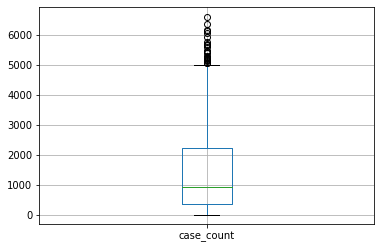

In [12]:
df.boxplot(column=['case_count'])

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [13]:
df['pow2_case_count']= df['hospitalized_count']**2
df

,case_count,hospitalized_count,pow2_case_count
0,1,1,1
1,0,1,1
2,0,2,4
3,1,7,49
4,5,2,4
...,...,...,...
614,850,35,1225
615,738,23,529
616,457,24,576
617,513,13,169


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [14]:
df2 = pd.read_csv('2014-07 - Citi Bike trip data.csv')
df2 = pd.DataFrame(df2)

In [15]:
#remove non-numerical birth year data
df2 = df2[pd.to_numeric(df2['birth year'], errors='coerce').notnull()]
df2['starttime'] = df2['starttime'].astype('string')
df2['date_dd'] = df2['starttime'].str[8:10].astype('int32')
df2['starttime'] = pd.to_datetime(df2['starttime'], format="%Y-%m-%d %H:%M:%S")
df2['day_of_week'] = df2['starttime'].dt.day_name()
df2['start_hour'] = df2['starttime'].dt.hour

In [16]:
df2

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date_dd,day_of_week,start_hour
0,404,2014-07-01 00:00:04,2014-07-01 00:06:48,545,E 23 St & 1 Ave,40.736502,-73.978095,402,Broadway & E 22 St,40.740343,-73.989551,19578,Subscriber,1987,2,1,Tuesday,0
1,850,2014-07-01 00:00:06,2014-07-01 00:14:16,238,Bank St & Washington St,40.736197,-74.008592,458,11 Ave & W 27 St,40.751396,-74.005226,19224,Subscriber,1987,1,1,Tuesday,0
2,1550,2014-07-01 00:00:21,2014-07-01 00:26:11,223,W 13 St & 7 Ave,40.737815,-73.999947,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,17627,Subscriber,1973,2,1,Tuesday,0
3,397,2014-07-01 00:00:29,2014-07-01 00:07:06,224,Spruce St & Nassau St,40.711464,-74.005524,2008,Little West St & 1 Pl,40.705693,-74.016777,15304,Subscriber,1982,1,1,Tuesday,0
4,609,2014-07-01 00:00:37,2014-07-01 00:10:46,346,Bank St & Hudson St,40.736529,-74.006180,521,8 Ave & W 31 St,40.750450,-73.994811,20062,Subscriber,1972,2,1,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968835,66,2014-07-31 23:59:00,2014-08-01 00:00:06,312,Allen St & E Houston St,40.722055,-73.989111,401,Allen St & Rivington St,40.720196,-73.989978,21123,Subscriber,1968,1,31,Thursday,23
968836,409,2014-07-31 23:59:24,2014-08-01 00:06:13,428,E 3 St & 1 Ave,40.724677,-73.987834,504,1 Ave & E 15 St,40.732219,-73.981656,16219,Subscriber,1986,2,31,Thursday,23
968838,260,2014-07-31 23:59:46,2014-08-01 00:04:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,20240,Subscriber,1951,2,31,Thursday,23
968839,318,2014-07-31 23:59:47,2014-08-01 00:05:05,521,8 Ave & W 31 St,40.750450,-73.994811,470,W 20 St & 8 Ave,40.743453,-74.000040,21400,Subscriber,1981,1,31,Thursday,23


## Count the number of missing values of each column

In [17]:
#show null values for each columns
df2.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
date_dd                    0
day_of_week                0
start_hour                 0
dtype: int64

In [18]:
#show number of null values for entire dataframe
df2.isnull().sum().sum()

0

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [19]:
df2.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                           object
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
date_dd                             int32
day_of_week                        object
start_hour                          int64
dtype: object

In [20]:
df2['birth year'] = df2['birth year'].astype(str).astype('int64')
df2['age']= 2014 - df2['birth year']

In [21]:
df2 = df2[df2['age'] < 90]

In [22]:
df2_gender_count = df2['gender'].value_counts()
gender_count = df2_gender_count.to_dict()

In [23]:
df2_usertype_count = df2['usertype'].value_counts()
usertype_count = df2_usertype_count.to_dict()

In [24]:
df2_age_count = df2['age'].value_counts()
age_count = df2_age_count.to_dict()

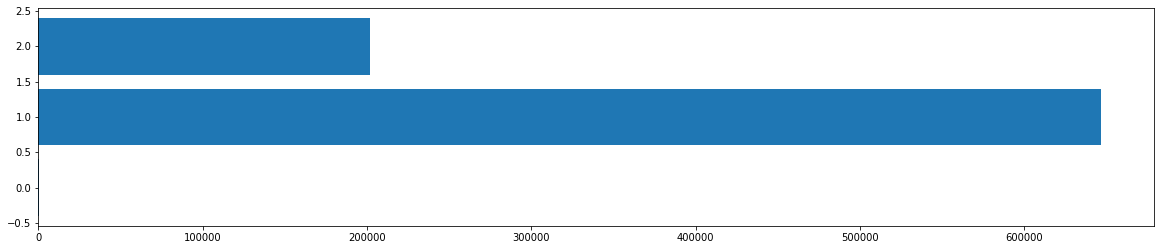

{1: 647045, 2: 202123, 0: 207}


In [25]:
gender = list(gender_count.keys())
gender_val = list(gender_count.values())

# creating the bar plot
plt.figure(figsize=(20,4))
plt.barh(gender, gender_val)
plt.show()
print(gender_count)

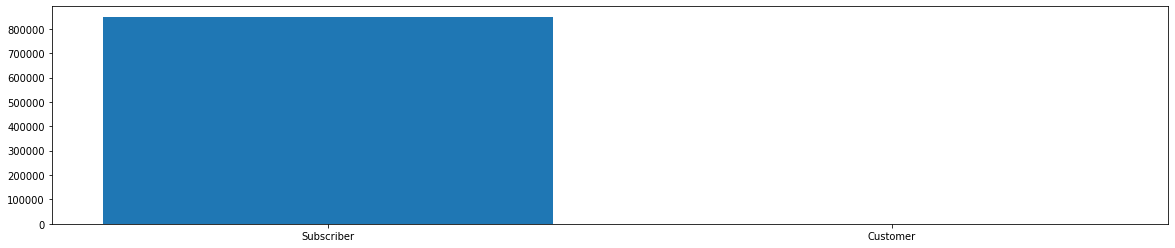

{'Subscriber': 849362, 'Customer': 13}


In [26]:
usertype = list(usertype_count.keys())
usertype_val = list(usertype_count.values())

# creating the bar plot
plt.figure(figsize=(20,4))
plt.bar(usertype, usertype_val)
plt.show()
print(usertype_count)

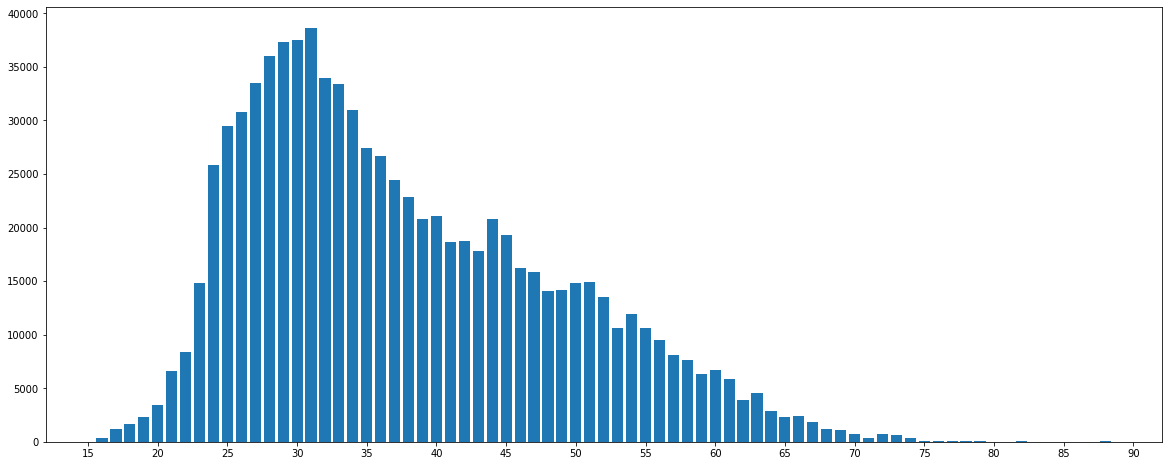

{31: 38660, 30: 37532, 29: 37287, 28: 35974, 32: 33977, 27: 33518, 33: 33408, 34: 30979, 26: 30768, 25: 29454, 35: 27469, 36: 26662, 24: 25853, 37: 24402, 38: 22896, 40: 21036, 44: 20776, 39: 20775, 45: 19311, 42: 18738, 41: 18669, 43: 17813, 46: 16265, 47: 15824, 51: 14895, 50: 14836, 23: 14791, 49: 14186, 48: 14054, 52: 13511, 54: 11959, 53: 10646, 55: 10590, 56: 9534, 22: 8368, 57: 8135, 58: 7651, 60: 6688, 21: 6595, 59: 6360, 61: 5826, 63: 4598, 62: 3884, 20: 3479, 64: 2918, 66: 2390, 65: 2361, 19: 2331, 67: 1864, 18: 1616, 17: 1191, 68: 1173, 69: 1081, 70: 754, 72: 718, 73: 650, 16: 391, 71: 387, 74: 341, 76: 114, 78: 102, 75: 99, 77: 80, 79: 45, 82: 43, 88: 37, 81: 28, 80: 26, 84: 2, 83: 1}


In [27]:
age = list(age_count.keys())
age_val = list(age_count.values())
import numpy as np
# creating the bar plot
plt.figure(figsize=(20,8))
plt.xticks(np.arange(0,91,5))
plt.bar(age, age_val)
plt.show()
print(age_count)

## What is the average number of trips per day?

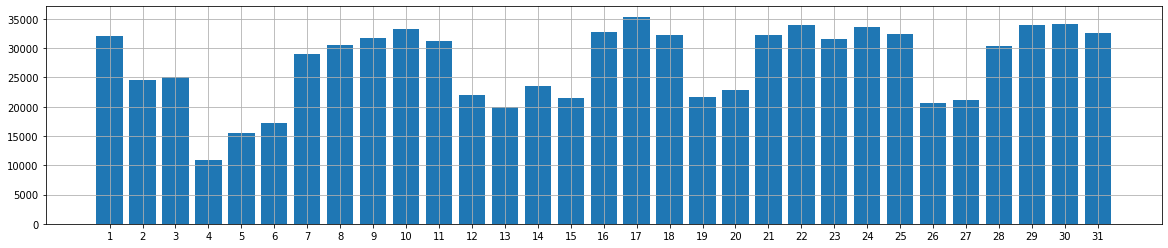

Average number of trips per day: 27399.19


In [28]:
df2_date_dd_count = df2['date_dd'].value_counts()
date_dd_count = df2_date_dd_count.to_dict()
date_dd = list(date_dd_count.keys())
date_dd_val = list(date_dd_count.values())

plt.figure(figsize=(20,4))
plt.xticks(np.arange(1,32,1))
plt.grid()
plt.bar(date_dd, date_dd_val)
plt.show()
print(f'Average number of trips per day: {np.round(np.mean(date_dd_val),2)}')

## What is the average trip duration?

In [29]:
avg = df2['tripduration'].mean()
print(f'Average Trip Duration: {avg}')

Average Trip Duration: 767.5182716703458


## What days of the week are most rides taken on?
Process the data and plot your answer

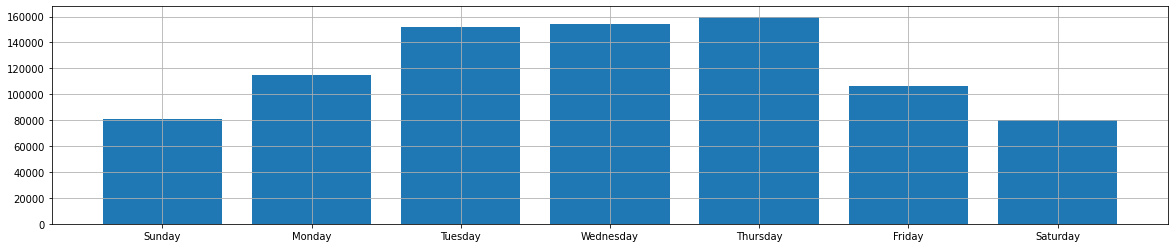

In [30]:
df2_day_of_week_count = df2['day_of_week'].value_counts()
day_of_week_count = df2_day_of_week_count.to_dict()

from collections import OrderedDict
weeks=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
ordered_day_of_week = OrderedDict(sorted(day_of_week_count.items(),key =lambda x:weeks.index(x[0])))

day_of_week = list(ordered_day_of_week.keys())
day_of_week_val = list(ordered_day_of_week.values())
plt.figure(figsize=(20,4))
plt.grid()
plt.bar(day_of_week, day_of_week_val)
plt.show()

#### DAPAT TERLIHAT BAHWA CENDERUNG LEBIH BANYAK ORANG BERSEPEDA DI HARI BIASA (BUKAN WEEKEND)

## What hour of the day are most rides taken on?
Process the data and plot your answer

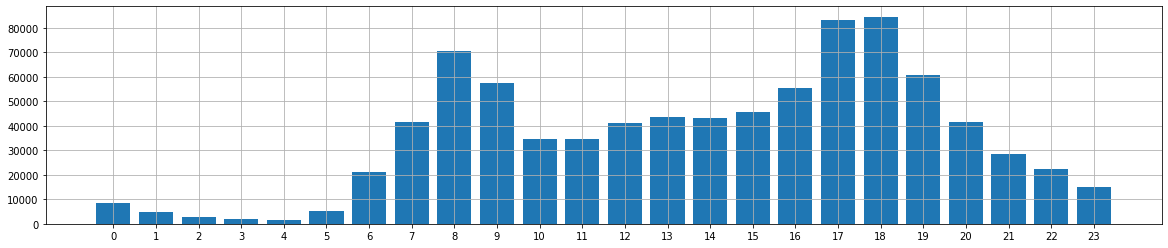

In [32]:
#assume we're counting when the most rides starts at

df2_hour_count = df2['start_hour'].value_counts()
hour_count = df2_hour_count.to_dict()

start_hour = list(hour_count.keys())
hour_val = list(hour_count.values())
plt.figure(figsize=(20,4))
plt.xticks(np.arange(0,24,1))
plt.grid()
plt.bar(start_hour, hour_val)
plt.show()

### Through visualization of the data, we can see that most rides are taken during the morning & afternoon

### Is there correlation between age and trip duration?

In [33]:
import seaborn as sns
df2[['age','tripduration']].corr()

,age,tripduration
age,1.000000,0.034935
tripduration,0.034935,1.000000


<AxesSubplot:xlabel='age', ylabel='tripduration'>

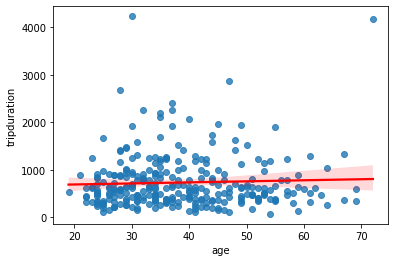

In [34]:
sns.regplot(data=df2.sample(300, random_state=1), x='age', y='tripduration', line_kws={"color": "red"})

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [35]:
df2

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date_dd,day_of_week,start_hour,age
0,404,2014-07-01 00:00:04,2014-07-01 00:06:48,545,E 23 St & 1 Ave,40.736502,-73.978095,402,Broadway & E 22 St,40.740343,-73.989551,19578,Subscriber,1987,2,1,Tuesday,0,27
1,850,2014-07-01 00:00:06,2014-07-01 00:14:16,238,Bank St & Washington St,40.736197,-74.008592,458,11 Ave & W 27 St,40.751396,-74.005226,19224,Subscriber,1987,1,1,Tuesday,0,27
2,1550,2014-07-01 00:00:21,2014-07-01 00:26:11,223,W 13 St & 7 Ave,40.737815,-73.999947,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,17627,Subscriber,1973,2,1,Tuesday,0,41
3,397,2014-07-01 00:00:29,2014-07-01 00:07:06,224,Spruce St & Nassau St,40.711464,-74.005524,2008,Little West St & 1 Pl,40.705693,-74.016777,15304,Subscriber,1982,1,1,Tuesday,0,32
4,609,2014-07-01 00:00:37,2014-07-01 00:10:46,346,Bank St & Hudson St,40.736529,-74.006180,521,8 Ave & W 31 St,40.750450,-73.994811,20062,Subscriber,1972,2,1,Tuesday,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968835,66,2014-07-31 23:59:00,2014-08-01 00:00:06,312,Allen St & E Houston St,40.722055,-73.989111,401,Allen St & Rivington St,40.720196,-73.989978,21123,Subscriber,1968,1,31,Thursday,23,46
968836,409,2014-07-31 23:59:24,2014-08-01 00:06:13,428,E 3 St & 1 Ave,40.724677,-73.987834,504,1 Ave & E 15 St,40.732219,-73.981656,16219,Subscriber,1986,2,31,Thursday,23,28
968838,260,2014-07-31 23:59:46,2014-08-01 00:04:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,20240,Subscriber,1951,2,31,Thursday,23,63
968839,318,2014-07-31 23:59:47,2014-08-01 00:05:05,521,8 Ave & W 31 St,40.750450,-73.994811,470,W 20 St & 8 Ave,40.743453,-74.000040,21400,Subscriber,1981,1,31,Thursday,23,33


In [36]:
df2_startstation = df2['start station name'].value_counts()
df2_endstation = df2['end station name'].value_counts()
df2_start = pd.DataFrame({'name':df2_startstation.index, 'count':df2_startstation.values})
df2_end = pd.DataFrame({'name':df2_endstation.index, 'count':df2_endstation.values})

In [37]:
df2_start.sort_values(by='name')

,name,count
28,1 Ave & E 15 St,5088
124,1 Ave & E 18 St,2938
65,1 Ave & E 30 St,3755
174,1 Ave & E 44 St,2176
111,10 Ave & W 28 St,3110
...,...,...
273,Willoughby Ave & Hall St,816
292,Willoughby Ave & Walworth St,570
260,Willoughby St & Fleet St,952
235,Wythe Ave & Metropolitan Ave,1368


In [38]:
df2_end.sort_values(by='name')

,name,count
29,1 Ave & E 15 St,4991
126,1 Ave & E 18 St,2989
69,1 Ave & E 30 St,3814
174,1 Ave & E 44 St,2156
99,10 Ave & W 28 St,3363
...,...,...
275,Willoughby Ave & Hall St,791
290,Willoughby Ave & Walworth St,580
269,Willoughby St & Fleet St,865
231,Wythe Ave & Metropolitan Ave,1480


In [39]:
df2_station_count = pd.concat([df2_start, df2_end]).groupby(['name']).sum().reset_index()
df2_station_count

,name,count
0,1 Ave & E 15 St,10079
1,1 Ave & E 18 St,5927
2,1 Ave & E 30 St,7569
3,1 Ave & E 44 St,4332
4,10 Ave & W 28 St,6473
...,...,...
323,Willoughby Ave & Hall St,1607
324,Willoughby Ave & Walworth St,1150
325,Willoughby St & Fleet St,1817
326,Wythe Ave & Metropolitan Ave,2848


In [40]:
df2_station_count.sort_values(by='count', ascending=False).head(10)

,name,count
16,8 Ave & W 31 St,21068
130,E 42 St & Vanderbilt Ave,18859
106,E 17 St & Broadway,18402
197,Lafayette St & E 8 St,17815
272,W 21 St & 6 Ave,15351
46,Broadway & E 22 St,14265
320,West St & Chambers St,13149
45,Broadway & E 14 St,13143
260,University Pl & E 14 St,13033
9,2 Ave & E 31 St,13016


## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



## Hypothesis:
### The most used station as a starting point has higher average duration

## Work with your dataset and show your findings to help answer your question

In [42]:
df3 = df2.groupby('start station name')['tripduration'].mean()
df3 = pd.DataFrame({'name':df3.index, 'tripduration':df3.values})
df3.sort_values(by='name')

,name,tripduration
0,1 Ave & E 15 St,682.621266
1,1 Ave & E 18 St,707.330837
2,1 Ave & E 30 St,761.737683
3,1 Ave & E 44 St,754.839154
4,10 Ave & W 28 St,684.196785
...,...,...
323,Willoughby Ave & Hall St,695.150735
324,Willoughby Ave & Walworth St,1008.324561
325,Willoughby St & Fleet St,522.622899
326,Wythe Ave & Metropolitan Ave,1307.236111


In [43]:
result = pd.merge(df3, df2_start, on=['name'])
result

,name,tripduration,count
0,1 Ave & E 15 St,682.621266,5088
1,1 Ave & E 18 St,707.330837,2938
2,1 Ave & E 30 St,761.737683,3755
3,1 Ave & E 44 St,754.839154,2176
4,10 Ave & W 28 St,684.196785,3110
...,...,...,...
323,Willoughby Ave & Hall St,695.150735,816
324,Willoughby Ave & Walworth St,1008.324561,570
325,Willoughby St & Fleet St,522.622899,952
326,Wythe Ave & Metropolitan Ave,1307.236111,1368


Linear Regression function:
 
-0.02267 x + 854.4


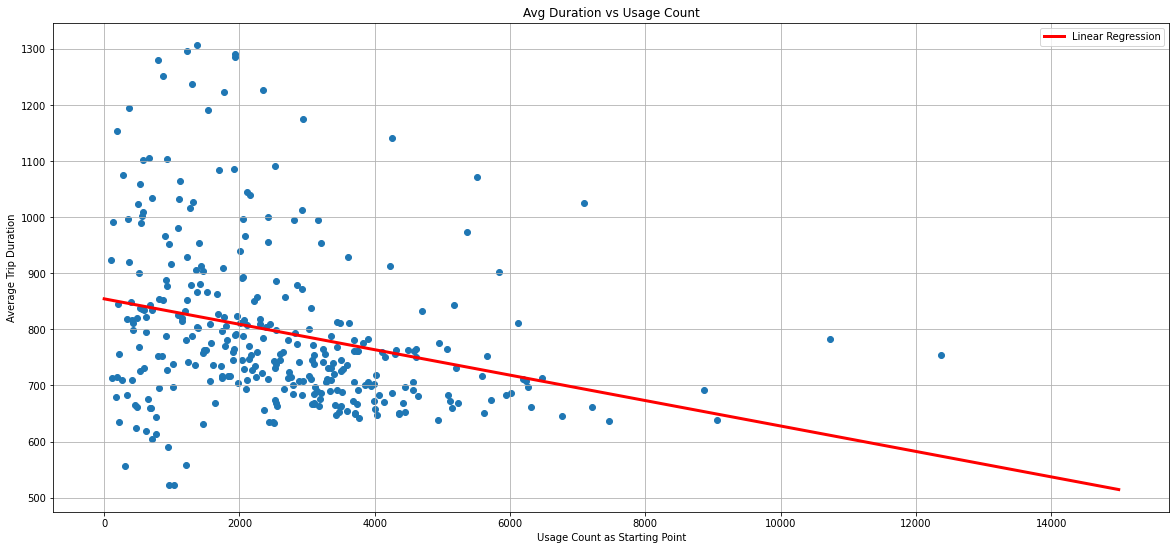

In [44]:
x= result['count']
y= result['tripduration']
plt.figure(figsize=(20,9))
plt.title('Avg Duration vs Usage Count')
plt.scatter(x,y)
mymodel_a = np.poly1d(np.polyfit(x, y, 1))
x_step = np.arange(1,15001,1)
plt.plot(x_step, mymodel_a(x_step), c="red", linewidth=3 , label='Linear Regression')
print(f'Linear Regression function:\n{mymodel_a}')
plt.ylabel('Average Trip Duration')
plt.xlabel('Usage Count as Starting Point')
plt.grid()
plt.legend()
plt.show()

### Dapat dilihat bahwa ada korelasi negatif antara semakin banyaknya suatu station dipakai untuk starting point dengan durasi rata rata trip

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```

## OK!